<a href="https://colab.research.google.com/github/MOHD-TAUFIQUE/Airbnb-EDA_Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Airbnb EDA Capstone project by Mohd Taufique**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive') #Mounting the drive to access the given Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# importing all the required libraries for data analysis & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from skimage.io import imread

## **Loading the Data**


Using pandas library, we will load Airbnb NYC 2019.csv file and name it 'airbnb_df'.

In [4]:
#Loading the Dataset
airbnb_df=pd.read_csv("/content/drive/MyDrive/EDA-Capstone-Project _ALmaBetter/Copy of Airbnb NYC 2019.csv")


In [5]:
# making the copy of the airbnb_df so that any change in copied df does not affect the original dataset
airbnb_df_copy=airbnb_df.copy()


##Data Exploration and variable identification

In [6]:
#Understanding the Data
airbnb_df_copy.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [7]:
airbnb_df_copy.info() # Checking the general information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
num_rows=airbnb_df_copy.shape[0] # provide the number of rows in the dataset
num_col=airbnb_df_copy.shape[1] # provide the number of columns in the dataset.
print(num_rows)
print(num_col)

48895
16


In [9]:
#checking what are the features/columns present in the dataframe
list(airbnb_df_copy.columns)

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [10]:
len(airbnb_df_copy['id'].unique()) #sanity check shows here that all the property ids are different

48895

In [11]:
# Checking the descriptive information about all numerical features
airbnb_df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [12]:
# Number of property/listings which have 0 price listed.
len(airbnb_df_copy[airbnb_df_copy['price']==0])

11

In [52]:
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()


21877

In [53]:
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())


65

In [54]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [59]:
#Replace the value of price according to minimum night where price = 0$ 
airbnb_df['price'] = np.where(
   (airbnb_df['price'] == 0) ,price_calculator(airbnb_df['minimum_nights']) , airbnb_df['price'])

In [61]:
#Our new description of dataset 
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.828367,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.421048,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
# Drop  if there is any duplicates.
airbnb_df_copy.drop_duplicates(inplace=True)

In [14]:
# checking the missing/Null values for each columns in the dataset
airbnb_df_copy.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [42]:
# The columns like last_review and reviews_per_month have more number of null values and as they are unnecessary columns, just drop them.
airbnb_df_copy=airbnb_df_copy.drop(['last_review','reviews_per_month'], axis=1)

KeyError: ignored

In [16]:
#Fill the missing values
airbnb_df_copy['name'].fillna('missing', inplace = True)
airbnb_df_copy['host_name'].fillna('missing', inplace=True)
airbnb_df_copy.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [17]:
airbnb_df['host_name'].nunique() #unique hosts


11452

In [18]:
airbnb_df['name'].nunique() #unique listings


47905

In [19]:
# Host ids with most listings counts
airbnb_df['host_id'].value_counts()[:5] 


219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [20]:
# Top 5 hosts with most listings counts in entire NYC
airbnb_df_copy['host_name'].value_counts()[:5] 


Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

### if a person trying to book a listing/property for stay/rent,he/she will look for the following factors at the time of booking:
###name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews.These are the important ones in our analysis.

## **Data Analysis and Visualization step by step**.

In [49]:
# Hosts Number in different neighbourhood groups
hosts_per_neighbourhood_group = airbnb_df_copy.groupby(['neighbourhood_group']).size().reset_index(name='no_of_hosts').sort_values(by='no_of_hosts',ascending=False)
hosts_per_neighbourhood_group

,neighbourhood_group,no_of_hosts
2,Manhattan,21661
1,Brooklyn,20104
3,Queens,5666
0,Bronx,1091
4,Staten Island,373


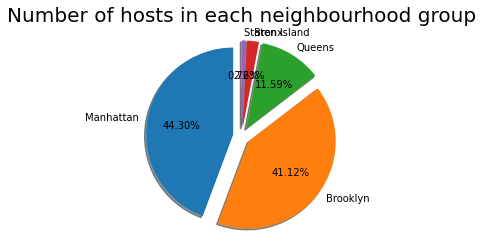

In [22]:
plt.pie(hosts_per_neighbourhood_group['no_of_hosts'],labels=hosts_per_neighbourhood_group['neighbourhood_group'], autopct ='%0.2f%%', startangle =90, explode = [0.1,0.1,0.1,0.1,0.1], shadow = True )

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Number of hosts in each neighbourhood group', {'fontsize': 20})
plt.show()

###Key points:- Most of the Hosts are in Manhattan and Brooklyn

In [23]:
#Hosts and host listings/property
hosts_listings = airbnb_df_copy.groupby(['host_name'])['calculated_host_listings_count'].max().reset_index()
highest_calculated_host_listings_count = hosts_listings.sort_values(['calculated_host_listings_count'], ascending=False).head(10)
highest_calculated_host_listings_count

,host_name,calculated_host_listings_count
9781,Sonder (NYC),327
1356,Blueground,232
5336,Kara,121
5471,Kazuya,103
9780,Sonder,96
4809,Jeremy & Laura,96
2123,Corporate Housing,91
5524,Ken,87
8395,Pranjal,65
7223,Mike,52


Text(0, 0.5, 'Host listings count')

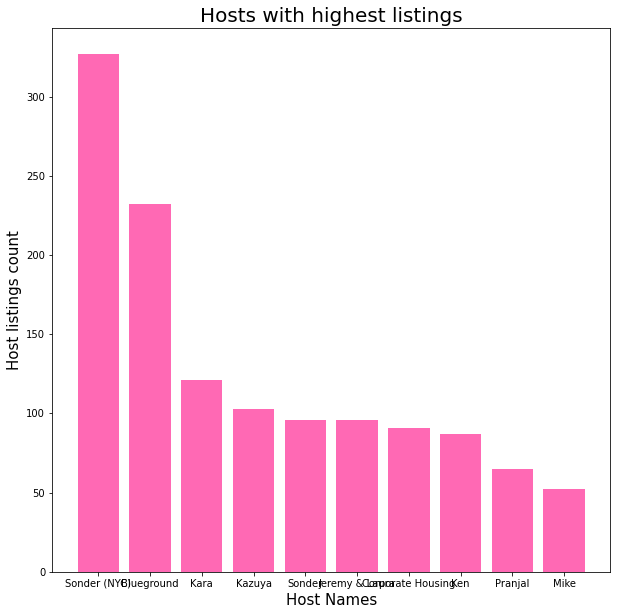

In [24]:
#Plotting the graph of hosts with highest calculated host listings count
host_name = highest_calculated_host_listings_count['host_name']
calculated_host_listings_count = highest_calculated_host_listings_count['calculated_host_listings_count']
plt.bar(host_name,calculated_host_listings_count,color = "hotpink")

plt.rcParams['figure.figsize'] = (15,7)
plt.title('Hosts with highest listings', {'fontsize':20})
plt.xlabel('Host Names',{'fontsize':15})
plt.ylabel('Host listings count',{'fontsize':15})

In [47]:
#Reviews and neighbourhood groups
reviews_per_neighbourhood_group = airbnb_df_copy.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending=False)
reviews_per_neighbourhood_group.reset_index()

,index,neighbourhood_group,number_of_reviews
0,3,Queens,629
1,2,Manhattan,607
2,1,Brooklyn,488
3,4,Staten Island,333
4,0,Bronx,321


Text(0, 0.5, 'Number of reviews')

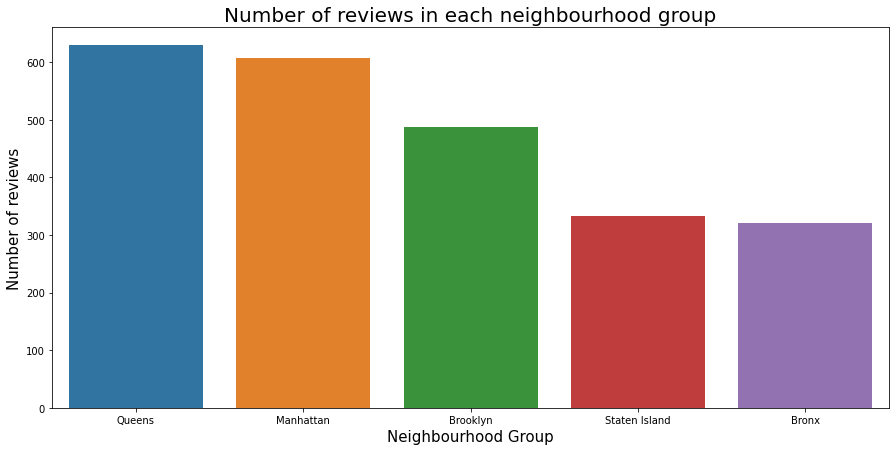

In [26]:
ax = sns.barplot(x=reviews_per_neighbourhood_group['neighbourhood_group'], y=reviews_per_neighbourhood_group['number_of_reviews'], data=reviews_per_neighbourhood_group)

plt.rcParams['figure.figsize'] = (8,6)
ax.set_title('Number of reviews in each neighbourhood group',{'fontsize':20})
ax.set_xlabel('Neighbourhood Group', {'fontsize':15})
ax.set_ylabel('Number of reviews',{'fontsize':15})

In [27]:
room_type_reviews = airbnb_df_copy.groupby('room_type')['number_of_reviews'].count().reset_index()
room_type_reviews

,room_type,number_of_reviews
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


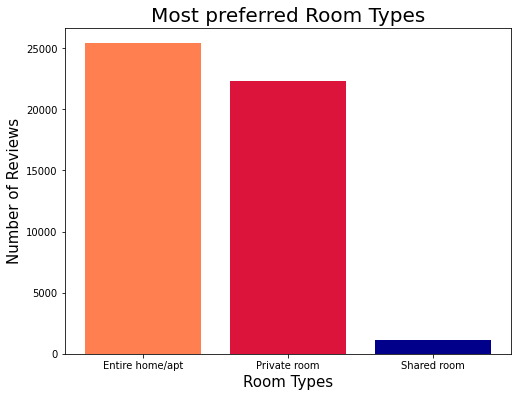

In [28]:
c=['coral','crimson','darkblue']
plt.bar(room_type_reviews['room_type'],room_type_reviews['number_of_reviews'], color=c)

plt.rcParams['figure.figsize'] = (8,5)
plt.title('Most preferred Room Types', {'fontsize':20})
plt.xlabel('Room Types',{'fontsize':15})
plt.ylabel('Number of Reviews',{'fontsize':15})
plt.show()

In [29]:
# Indentifying Total records and Finding out How many Unique Values ??

print('Total Number of Obervations',len(airbnb_df_copy['neighbourhood']))
print('Total Unique Values',len(airbnb_df.neighbourhood.unique()))

Total Number of Obervations 48895
Total Unique Values 221


In [30]:
top_10_neighbourhood = airbnb_df_copy['neighbourhood'].value_counts().index[0:10]

No handles with labels found to put in legend.
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


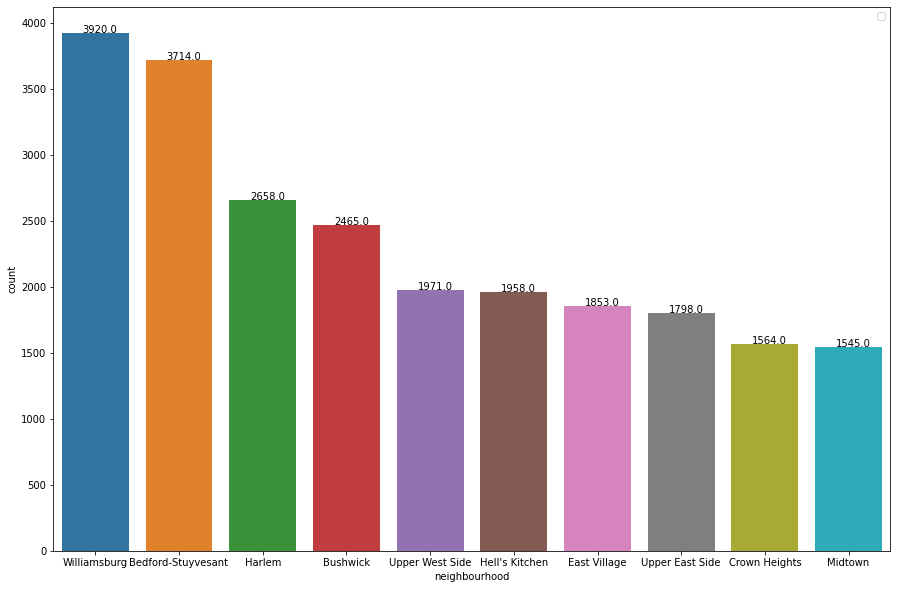

In [31]:
# Top 10 neighbourhood with highest number of bookings

plt.figure(figsize=(15,10))
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('Values')
ax = sns.countplot(airbnb_df_copy['neighbourhood'], order = top_10_neighbourhood)

for p in ax.patches:
  ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

In [32]:
#Lets consider the host with most reviews
hosts_reviews = airbnb_df_copy.groupby(['host_id','host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index().sort_values('number_of_reviews',ascending=False).head(10)
hosts_reviews

,host_id,host_name,room_type,neighbourhood_group,number_of_reviews
24546,47621202,Dona,Private room,Queens,629
7721,4734398,Jj,Private room,Manhattan,607
22268,37312959,Maya,Private room,Queens,543
4602,2369681,Carol,Private room,Manhattan,540
19494,26432133,Danielle,Private room,Queens,510
13741,12949460,Asa,Entire home/apt,Brooklyn,488
1978,792159,Wanda,Private room,Brooklyn,480
5068,2680820,Linda,Private room,Queens,474
161,42273,Dani,Entire home/apt,Brooklyn,467
18335,23591164,Angela,Private room,Queens,466


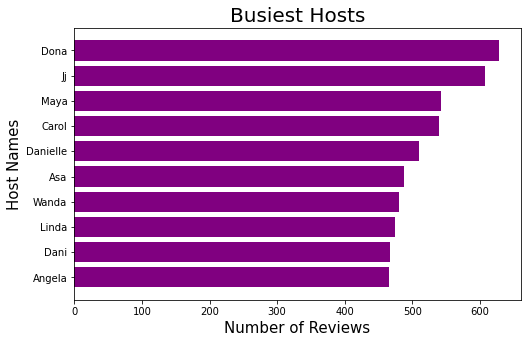

In [33]:
#c=['firebrick', 'green', 'blue', 'black', 'red','purple', 'seagreen', 'skyblue', 'black']
hosts_reviews.sort_values('number_of_reviews',inplace=True)
plt.barh(hosts_reviews['host_name'],hosts_reviews['number_of_reviews'],color='purple')

plt.rcParams['figure.figsize'] = (13,8)
plt.title('Busiest Hosts', {'fontsize':20})
plt.xlabel('Number of Reviews',{'fontsize':15})
plt.ylabel('Host Names',{'fontsize':15})

plt.show()

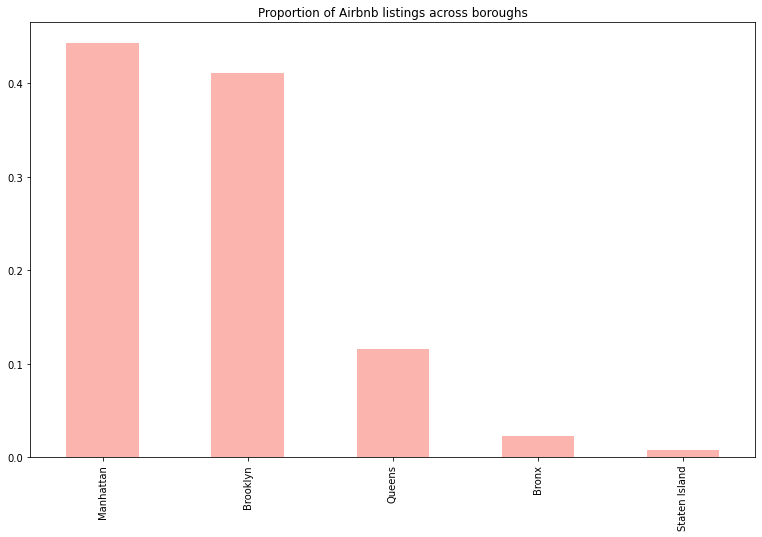

In [34]:
# obtain a bar chart of the proportion of Airbnb listings in five boroughs/Neighbourhood_group
(airbnb_df_copy.neighbourhood_group.value_counts()/airbnb_df_copy.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings across boroughs')


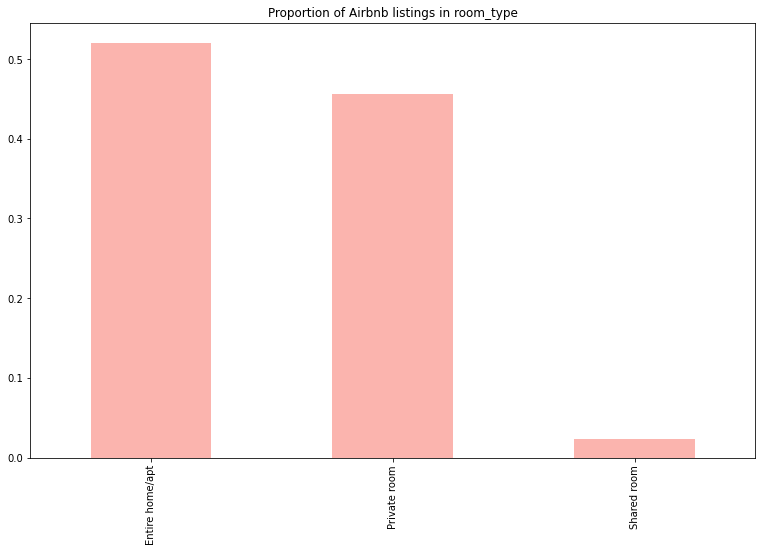

In [35]:
# obtain a bar chart of the proportion of Airbnb listings in room_type
(airbnb_df_copy.room_type.value_counts()/airbnb_df_copy.shape[0]).plot.bar(cmap='Pastel1',title='Proportion of Airbnb listings in room_type')

In [36]:
# obtain a dataframe of average availability_365 across five boroughs in room_type
pd.DataFrame(airbnb_df_copy.groupby(['neighbourhood_group','room_type']).mean()['availability_365']).unstack()

availability_365                         
room_type            Entire home/apt Private room Shared room
neighbourhood_group                                          
Bronx                     158.000000   171.331288  154.216667
Brooklyn                   97.205147    99.917983  178.007264
Manhattan                 117.140996   101.845026  138.572917
Queens                    132.267176   149.222716  192.186869
Staten Island             178.073864   226.361702   64.777778

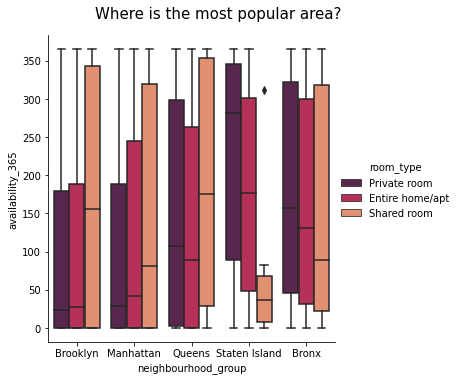

In [37]:
# Availability according to different room_type in different neighbourhood_group
fig = sns.catplot(x='neighbourhood_group',y='availability_365',kind='box',hue='room_type',data=airbnb_df_copy,palette='rocket')
fig.fig.suptitle('Where is the most popular area?',fontsize=15,y=1.05)
fig.savefig('popular_area.png', bbox_inches = 'tight')

In [38]:
# obtain a dataframe of average price across five boroughs in room_type
pd.DataFrame(airbnb_df_copy.groupby(['neighbourhood_group','room_type'])['price'].mean()).unstack()

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    127.506596    66.788344   59.800000
Brooklyn                 178.327545    76.500099   50.527845
Manhattan                249.239109   116.776622   88.977083
Queens                   147.050573    71.762456   69.020202
Staten Island            173.846591    62.292553   57.444444

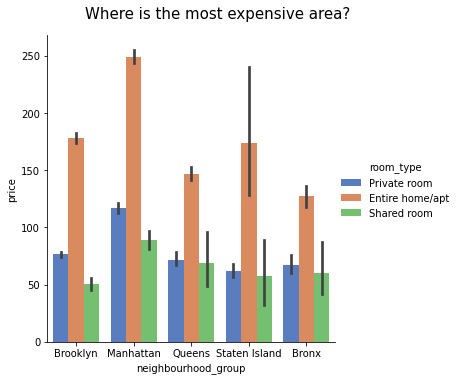

In [39]:
# Price according to different room_type in different areas
fig2 = sns.catplot(x='neighbourhood_group',y='price',data=airbnb_df_copy,kind='bar',hue='room_type',palette='muted')
fig2.fig.suptitle('Where is the most expensive area?',fontsize=15,y=1.05)
fig2.savefig('price_area.png', bbox_inches = 'tight')

In [40]:
!pip install nbmerge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nbmerge: filename=nbmerge-0.0.4-py2.py3-none-any.whl size=6413 sha256=aec0f16e3690dec7df469e185cc43dc491df35c77daac3eb141a85673ee12830
  Stored in directory: /root/.cache/pip/wheels/ce/2d/ef/1833d9299f557279f700d29a3355ad2b5fa9e35c32f84c5b3a
Successfully built nbmerge


In [62]:
airbnb_df_copy.duplicated().sum()

0